# Homework 1: Setup & Rounding Error
Physics 177, Spring 2017  (Prof. Tanedo)  
**Due**: Tuesday, April 18

Joshua Salazar  

## Discussion

Feel free to use whatever resources you need to get up to speed with the tools (Python, Jupyter, GitHub). You are encouraged to work with other students, especially for technical set up. Please note the following:
* While you are free to discuss the problems, every line of code you type should be your own and *not* copied-and-pasted from anyone else. You should write your code without referring to anyone else.
* We will penalize plagiarism harshly.


## 1. Getting Set Up

Set up **Python** on your system. Version 3.6 is preferred, but we shouldn't have any major problems if you're using an earlier 3.x version or 2.7.

You are also responsible for setting up the **Jupyter** notebook (formerly iPython) environment. 

Sign up for a free **GitHub** account. The account should be associated with your UCR e-mail address. (You may also use an existing account.) All work for this course will be completed in Jupyter notebooks and submitted to GitHub. 
- I strongly suggest that you use a professional username. Your GitHub account is a de-facto resume/CV when you apply for jobs (both academic and industry).
- I also suggest uploading a photo to help us learn your names.

**Important**: send an e-mail to Prof. Tanedo and Corey Kownacki (TA). The subject of the e-mail should be *P177: Homework 1* and you should clearly indicate your GitHub username and the URL to your GitHub account. 


## 2. Cloning this notebook

Homework, like this one, will be posted to the course GitHub:  
https://github.com/orgs/Physics177-2017/  

For those already familiar with GitHub, you can go ahead and fork a copy of this notebook. The instructions below are the "round-about" way of doing things.

1. Download ("clone") this notebook to your own computer.

2. Open your local copy of this notebook.

3. Go to the top cell of this notebook and replace "**Your Name**" with your actual name. *Remark*: the anime film *Your Name* was recently released in US theaters. As of this writing, it has a 79% score on Metacritic.

4. Save this notebook

5. Create a new repository on GitHub called **P177_Homework01**. Initialize it with a **README.md** file, where you can briefly explain that this is Homework 1. Feel free to add any other comments in the README that you think are appropriate.

6. Upload your local copy of this notebook to this repository. Be sure to write a brief note under **Commit changes**. Say something like "initial upload."

7. Make sure that the copy of your homework in your repository actually has your name on top. If not, troubleshoot.

## 3. Markdown Practice

For this problem, I'd like you **create a markdown cell** just below this one and explore the markdown syntax. Use *Insert* > *Insert Cell Below* from this cell.

Here's one useful reference:
https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

I'd like you to include the following in this new cell:
1. Create a subheading (using two hashtags) 
2. Create a list
3. Use **boldface** and *italics*
4. Your favorite equation, written in $\LaTeX$
5. Embed a YouTube trailer of the film *Your Name*. For this you may want to refer to http://stackoverflow.com/a/27315283. 

## Markdown Practice Answers: A Super Computer's Solution to a Joke
1. *UserInput Question*:
  * What do you get when you cross an owl with a bungee cord?
2. *Analysis*:
  * **owl** -> Declare as variable.
  * **bungee cord** -> Declare as variable.
  * **cross** -> Apply *Addition Operator*.
3. *Solution*:
  $$Owl + Bungee Cord = x$$
  * No limit. Possible solutions: 
  $$-\infty <x< \infty$$
  * No analytical solution possible. Searching for information on variables ... Solution found. Solution in succeeding cell.

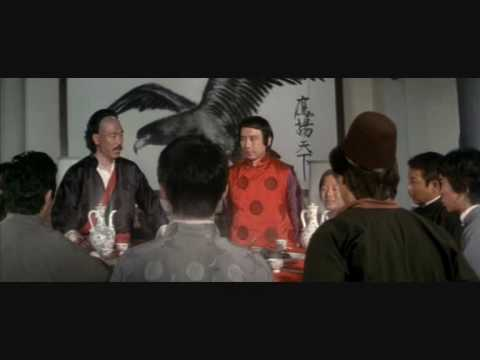

In [4]:
  from IPython.display import YouTubeVideo
# Clip from the movie "Kung Pow: Enter the Fist".
# Video credit: EKREM CAGALA.
YouTubeVideo('JR-5O2Isfl8')

## 4. Simpson's Rule Answers
In class we built a simple Riemann sum integrator. The code that we wrote together is posted here:
https://github.com/Physics177-2017/Lec03-Rounding-Error

In this problem, please perform the *same* analysis on the *same* test function using **Simpson's rule**. 

What's that? Well, you'll have to read a little about it. You can find a discussion in section 5.1.2 of the course textbook (Newman, *Computational Physics*, 2nd ed.). For those who do not have a copy, you can find a discussion in Chapter 3 of Stickler's *Basic concepts in computational physics*, which is available electronically through the UCR library here: http://scotty.ucr.edu/record=b5077839~S5 (click on "Connect to: SpringerLink")

Create a cell below this one and do the following:
1. Create an "integrator" function that takes in a function and a spacing, $\Delta x$, and outputs the integral of that function from 0 .to 1 using Simpson's rule.

2. Use the same test function that we did in lecture: $$f(x) = 3.0\times 10^{-10} x^2.$$

3. Find the error on your algorithm (compared to the exact result) for $\Delta x$ of $10^{-1}, \cdots, 10^{-7}$.

4. Compare this to the errors that we found using the Riemann sum. Are they better? Worse? What happens as we approach the "$10^{-16}$" numerical precision?

In [22]:
def integrator(f,deltax):
    """This function integrates from 0 to 1"""
    sample = 0.0
    total = 0.0
    while(sample<1):
        total = total + (1.0/3.0)*deltax*(f(sample) + 4*f(deltax + sample) + f(2*deltax + sample))
        sample = sample + 2*deltax
    return total

def f(x):
    return 3*(10**-10)*x**2
    
def intError(deltax):
    """gives the errror"""
    return 10**-10 - integrator(f,deltax)

someDeltaxs=[]
for i in range(1,8):
    someDeltaxs.append(10**-i)
    
integValueList=[]
for i in range(1,8):
    integValueList.append(integrator(f, 10**-i))

In [37]:
someDeltaxs

[0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07]

In [35]:
integValueList

[1.0000000000000002e-10,
 1.0000000000000008e-10,
 1.0000000000000018e-10,
 1.0006001200078729e-10,
 1.0000000000011745e-10,
 1.0000059999965527e-10,
 1.0000000000513562e-10]

In [32]:
list(map(intError,someDeltaxs))

[-1.2924697071141057e-26,
 -7.754818242684634e-26,
 -1.809457589959748e-25,
 -6.001200078728672e-14,
 -1.174467222854588e-22,
 -5.99999655269872e-16,
 -5.135615456520828e-21]

  The Simpson's version of integration seems to be both better and worse  
  * **Pro**: As noted by looking at the first list element of both the Riemann and Simpson result (deltax = 0.1), the Simpson's method error is about 10^(-13) times smaller than the Riemann's method error.
  * **Con**: The numerical precision of the error for the Simpson's method seems to be much worse at both larger and smaller deltax than the numerical precision of the error for the Riemann's method.
  * However, for both methods, the precision of the error becomes more unreliable as the deltax precision approaches the 10^-16 precision limit.

## 5. Thinking about rounding errors Answers

In your own words, explain what's happening in the following cell:

0.1+0.1+0.1 == .3

In [51]:
0.1+0.1+0.1==0.3

False

In [44]:
0.1+0.1==.2

True

In [50]:
0.15+0.15==0.3

True

In a new cell below this one, explain why the above result is not suprising. What happens if you sum $0.1+0.1$ and compare it to $0.2$? Explain this.

### Explanation
* The results of the above additions can be explained through the basic binary to decimal number conversion carried out by computers.  
$$(-1)^b * (1 + mantissa)* 2^e$$  
* Because the binary representation, the mantissas are calculated through the sum of 2^i where i is the number of bits from i = 1 to the memory limit (32-bit, 64-bit, etc.). This thus means that decimal precision is limited for floating point numbers. Therefore,the computer does not  
represent floating numbers ("0.1", "0.2", "0.3"...) as exactly those values. Overall, given the limited precision and the   binary representation, the sum of two "0.1" values does equal "0.2" not because they actually equal "0.2" but they happen to equal the computer's binary represenation of "0.2".  
(Note the mantissas inputed in the following equations were calaculated by hand and thus give the exact floating point values. However, a computer utlizing the binary represenation would only be able to approximate these calculated mantissas within a set precision.)
  
  $$0.1 + 0.1 = (-1^0 * 1.6* 2^{-4}) + (-1^0 * 1.6* 2^{-4}) = 2*(-1^0 * 1.6* 2^{-4}) = (-1^0 * 1.6* 2^{-3}) = 0.2 $$  
Remember that the "0.2" and the two "0.1" are not exactly 0.2 nor 0.1 but those values happen to share the same mantissa,  
 hence the reason why the binary comparison ends up being to true.   
* The reason why the sum of three "0.1" values do not add up to "0.3" can be similary shown  
   
   $$0.1 + 0.1 + 0.1 = 3*(-1^0 * 1.6* 2^{-4}) = (2^{\ln(3)/\ln(2)})*(-1^0 * 1.6* 2^{-4})= (-1^0 * 1.2* 2^{-2})$$  
  Here, the the sum of three "0.1"'s do not equal the machines approximation of "0.3" because the mantissa is effectively  
  changed. This would not matter if a computer were able to give the exact mantissas as shown, but the binary representation  
  only enables a computer to approximate those mantissas. Therefore, the error in the computer mantissa estimates allow for  
  measurable discrepancy between this calculated value of "0.3" and the raw binary represenation of "0.3" and computer has on  
  record. The discrepancy is then reflected by the false output of the comparision between the "0.3" and the sum of the the  
  "0.1"s.

## X1. [Extra Credit] Answer

INSPIRE is a database of papers in high-energy physics, you can find it here: http://inspirehep.net

Write a script in Jupyter that takes a string and opens up a web browser with an INSPIRE search for that string.

In [63]:
import webbrowser
searchTerm = input("Enter Search Item: ")
url = "http://inspirehep.net/search?ln=en&p=" + searchTerm + "&of=hb&action_search=Search&sf=earliestdate&so=d"
webbrowser.open_new_tab(url + 'doc/')

Enter Search Item: positron


True